<a href="https://colab.research.google.com/github/balaajhi/One-step-at-a-time/blob/main/Buy_and_Hold_AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%pip install yfinance


Using Yahoo finance to retrive data

In [ ]:
import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]
start = dt.datetime.today()-dt.timedelta(6000)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

# looping over tickers and creating a dataframe with close prices
for ticker in stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in stocks:
    ohlcv_data[ticker] = yf.download(ticker,start,end)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df = cl_price.iloc[: , :1]
df

,AMZN
Date,
2005-08-23,43.419998
2005-08-24,42.369999
2005-08-25,42.310001
2005-08-26,42.369999
2005-08-29,42.790001
...,...
2022-01-20,3033.350098
2022-01-21,2852.860107
2022-01-24,2890.879883


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4136 entries, 2005-08-23 to 2022-01-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    4136 non-null   float64
dtypes: float64(1)
memory usage: 64.6 KB


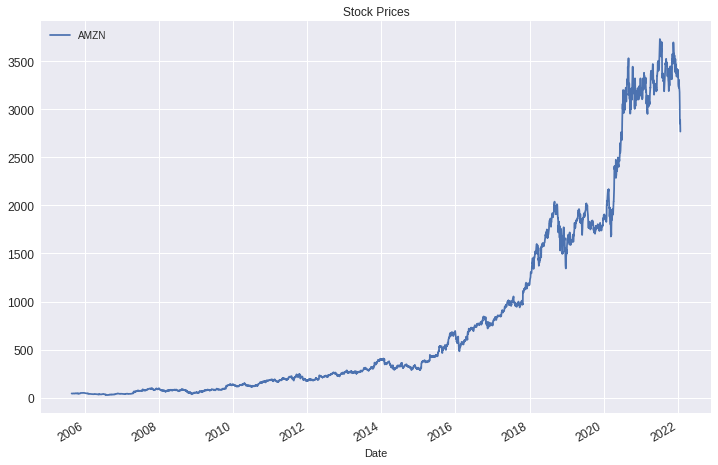

In [ ]:
df.plot(figsize = (12, 8), title = "Stock Prices", fontsize = 12)
plt.show()

In [ ]:
df["returns"] = np.log(df.div(df.shift(1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns
Date,,
2005-08-23,43.419998,NaN
2005-08-24,42.369999,-0.024480
2005-08-25,42.310001,-0.001417
2005-08-26,42.369999,0.001417
2005-08-29,42.790001,0.009864
...,...,...
2022-01-20,3033.350098,-0.030080
2022-01-21,2852.860107,-0.061346
2022-01-24,2890.879883,0.013239


## A simple Buy and Hold "Strategy"

In [ ]:
df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns
Date,,
2005-08-24,42.369999,-0.024480
2005-08-25,42.310001,-0.001417
2005-08-26,42.369999,0.001417
2005-08-29,42.790001,0.009864
2005-08-30,42.490002,-0.007036
...,...,...
2022-01-20,3033.350098,-0.030080
2022-01-21,2852.860107,-0.061346
2022-01-24,2890.879883,0.013239


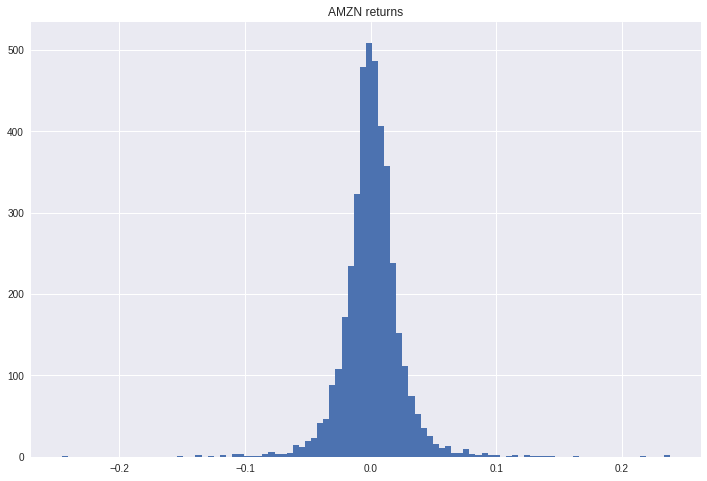

In [ ]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("AMZN returns")
plt.show()

In [ ]:
df.returns.sum()

4.155200425377345

In [ ]:
np.exp(df.returns.sum())

63.76474333991822

In [ ]:
df.AMZN[-1] / df.AMZN[0]

65.34494002498054

In [ ]:
df.returns.cumsum().apply(np.exp)

Date
2005-08-24     0.975818
2005-08-25     0.974436
2005-08-26     0.975818
2005-08-29     0.985491
2005-08-30     0.978581
                ...    
2022-01-20    69.860668
2022-01-21    65.703828
2022-01-24    66.579457
2022-01-25    64.479965
2022-01-26    63.764743
Name: returns, Length: 4135, dtype: float64

In [ ]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns,creturns
Date,,,
2005-08-24,42.369999,-0.024480,0.975818
2005-08-25,42.310001,-0.001417,0.974436
2005-08-26,42.369999,0.001417,0.975818
2005-08-29,42.790001,0.009864,0.985491
2005-08-30,42.490002,-0.007036,0.978581
...,...,...,...
2022-01-20,3033.350098,-0.030080,69.860668
2022-01-21,2852.860107,-0.061346,65.703828
2022-01-24,2890.879883,0.013239,66.579457


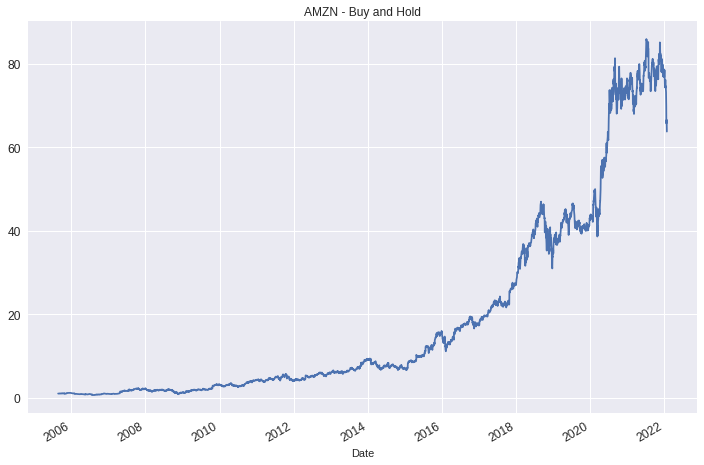

In [ ]:
df.creturns.plot(figsize = (12, 8), title = "AMZN - Buy and Hold", fontsize = 12)
plt.show()